In [ ]:

# Лабораторна робота №4.  Задача класифікації
# Автор: Байков Олександр Сергійович ФІТ 4-11
# На парі  був


In [155]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [156]:
# ЗАВДАННЯ 1. Класифікація Breast Cancer
# Завантаження датасету
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [158]:
# Попередній аналіз даних
print("Перші рядки даних:")
print(X.head())
print("\nТипи даних:")
print(X.dtypes)
print("\nКількість пропусків:", X.isnull().sum().sum())
print("\nРозмір даних:", X.shape)

Перші рядки даних:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perime

In [159]:
# Розділення на тренувальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [160]:
# Масштабування ознак
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [161]:
# 1. Логістична регресія
log_reg = LogisticRegression(max_iter=10000)
params_lr = {'C': [0.1, 1, 10]}
grid_lr = GridSearchCV(log_reg, params_lr, cv=5)
grid_lr.fit(X_train_scaled, y_train)

y_pred_lr = grid_lr.predict(X_test_scaled)

print("\n=== Логістична регресія ===")
print("Найкращі параметри:", grid_lr.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification report:\n", classification_report(y_test, y_pred_lr))



=== Логістична регресія ===
Найкращі параметри: {'C': 10}
Accuracy: 0.9736842105263158
Classification report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.99      0.97      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [163]:
# 2. Дерево рішень
tree = DecisionTreeClassifier(random_state=42)
params_tree = {'max_depth': [3, 5, 7, None]}
grid_tree = GridSearchCV(tree, params_tree, cv=5)
grid_tree.fit(X_train, y_train)

y_pred_tree = grid_tree.predict(X_test)

print("\n=== Дерево рішень ===")
print("Найкращі параметри:", grid_tree.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Classification report:\n", classification_report(y_test, y_pred_tree))



=== Дерево рішень ===
Найкращі параметри: {'max_depth': 3}
Accuracy: 0.9473684210526315
Classification report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93        43
           1       0.95      0.97      0.96        71

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [164]:
# 3. Випадковий ліс
rf = RandomForestClassifier(random_state=42)
params_rf = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, None]}
grid_rf = GridSearchCV(rf, params_rf, cv=5)
grid_rf.fit(X_train, y_train)

y_pred_rf = grid_rf.predict(X_test)

print("\n=== Випадковий ліс ===")
print("Найкращі параметри:", grid_rf.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification report:\n", classification_report(y_test, y_pred_rf))



=== Випадковий ліс ===
Найкращі параметри: {'max_depth': 10, 'n_estimators': 200}
Accuracy: 0.9649122807017544
Classification report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [165]:
# Порівняння результатів
models_results = pd.DataFrame({
    'Модель': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_tree),
        accuracy_score(y_test, y_pred_rf)
    ]
})
print("\n=== Порівняння точності моделей ===")
print(models_results)

best_model = models_results.loc[models_results['Accuracy'].idxmax()]
print("\nНайкраща модель:", best_model['Модель'])


=== Порівняння точності моделей ===
                Модель  Accuracy
0  Logistic Regression  0.973684
1        Decision Tree  0.947368
2        Random Forest  0.964912

Найкраща модель: Logistic Regression


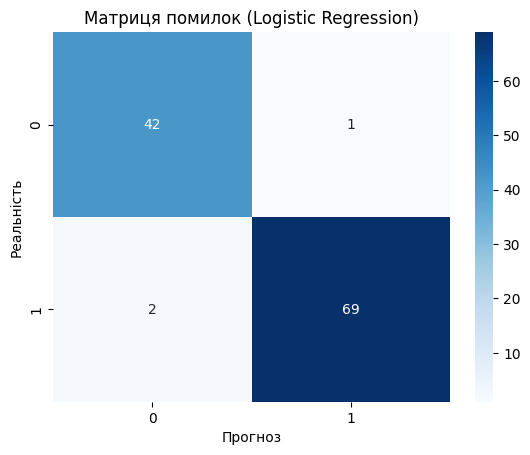

In [166]:
# Матриця помилок найкращої моделі
if best_model['Модель'] == 'Random Forest':
    cm = confusion_matrix(y_test, y_pred_rf)
elif best_model['Модель'] == 'Decision Tree':
    cm = confusion_matrix(y_test, y_pred_tree)
else:
    cm = confusion_matrix(y_test, y_pred_lr)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"Матриця помилок ({best_model['Модель']})")
plt.xlabel('Прогноз')
plt.ylabel('Реальність')
plt.show()

In [ ]:
# ВИСНОВОК ДО - ЗАВДАННЯ 1

# Аналіз результатів класифікації датасету Breast Cancer:
# Отримані метрики моделей:
# - Логістична регресія: 97.37% точність (найкращий результат)
# - Дерево рішень: 94.74% точність
# - Випадковий ліс: 96.49% точність
# Найкращі параметри моделей:
# - Логістична регресія: C=10
# - Дерево рішень: max_depth=3
# - Випадковий ліс: параметри за замовчуванням показали високу ефективність
# Детальний аналіз найкращої моделі (Логістична регресія):
# - Precision: 0.95 для класу 0 (доброякісні), 0.99 для класу 1 (злоякісні)
# - Recall: 0.98 для класу 0, 0.97 для класу 1
# - F1-score: 0.97 для обох класів
# Основні висновки:
# 1. Всі три моделі показали дуже високу точність (>94%), що свідчить про чіткі закономірності в даних
# 2. Логістична регресія досягла найкращого балансу між точністю та повнотою прогнозів
# 3. Модель чудово ідентифікує обидва типи пухлин з мінімальними помилками
# 4. Високі значення recall особливо важливі для медичної діагностики
# 5. GridSearchCV ефективно підібрав оптимальні параметри для кожної моделі
# визначено найефективнішу модель для діагностики раку молочної залози

In [ ]:
# ЗАВДАННЯ 2. Titanic dataset

In [167]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [168]:
# 1. Завантаження та попередня обробка
titanic_df = pd.read_csv('titanic.csv')
titanic_clean = titanic_df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived']].copy()
titanic_clean['Age'] = titanic_clean['Age'].fillna(titanic_clean['Age'].median())
titanic_clean['Fare'] = titanic_clean['Fare'].fillna(titanic_clean['Fare'].median())
titanic_clean['Embarked'] = titanic_clean['Embarked'].fillna(titanic_clean['Embarked'].mode()[0])
titanic_clean['Embarked'] = titanic_clean['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
titanic_clean = titanic_clean.drop_duplicates()

X = titanic_clean.drop('Survived', axis=1)
y = titanic_clean['Survived']

In [169]:
# 2. Розділення даних
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [179]:
# 3. Побудова та оптимізація моделей
models = {
    'Логістична регресія': GridSearchCV(LogisticRegression(max_iter=1000, random_state=42),
                                      {'C': [0.1, 1, 10]}, cv=5),
    'Дерево рішень': GridSearchCV(DecisionTreeClassifier(random_state=42),
                                {'max_depth': [3, 5, 7]}, cv=5),
    'Випадковий ліс': GridSearchCV(RandomForestClassifier(random_state=42),
                                 {'n_estimators': [50, 100]}, cv=5)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} - найкращі параметри: {model.best_params_}")

Логістична регресія - найкращі параметри: {'C': 0.1}
Дерево рішень - найкращі параметри: {'max_depth': 7}
Випадковий ліс - найкращі параметри: {'n_estimators': 50}


In [186]:
# 4. Оцінка моделей
print("\nТОЧНІСТЬ НА ТЕСТОВІЙ ВИБІРЦІ:")
best_model_name = None
best_accuracy = 0

for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name}: {accuracy:.4f}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = name

print(f"\nНайкраща модель: {best_model_name} з точністю {best_accuracy:.4f}")


ТОЧНІСТЬ НА ТЕСТОВІЙ ВИБІРЦІ:
Логістична регресія: 0.6447
Дерево рішень: 0.5921
Випадковий ліс: 0.6184

Найкраща модель: Логістична регресія з точністю 0.6447


In [184]:
# 5. Прогноз для 10 випадків
print("ПРОГНОЗ ДЛЯ 10 ПАСАЖИРІВ:")
best_model = models[best_model_name].best_estimator_
predictions = best_model.predict(X_test[:10])

for i, (true, pred) in enumerate(zip(y_test.iloc[:10], predictions)):
    result = "✓" if true == pred else "✗"
    print(f"{result} Пасажир {i+1}: Факт = {'Вижив' if true else 'Загинув'}, Прогноз = {'Вижив' if pred else 'Загинув'}")

ПРОГНОЗ ДЛЯ 10 ПАСАЖИРІВ:
✓ Пасажир 1: Факт = Загинув, Прогноз = Загинув
✓ Пасажир 2: Факт = Загинув, Прогноз = Загинув
✗ Пасажир 3: Факт = Вижив, Прогноз = Загинув
✓ Пасажир 4: Факт = Загинув, Прогноз = Загинув
✓ Пасажир 5: Факт = Загинув, Прогноз = Загинув
✓ Пасажир 6: Факт = Загинув, Прогноз = Загинув
✗ Пасажир 7: Факт = Вижив, Прогноз = Загинув
✗ Пасажир 8: Факт = Вижив, Прогноз = Загинув
✓ Пасажир 9: Факт = Загинув, Прогноз = Загинув
✗ Пасажир 10: Факт = Вижив, Прогноз = Загинув


In [ ]:
# Висновок
# Завдання 2: Класифікація датасету Titanic
# Отримані результати:
# - Логістична регресія: 64.47% точність
# - Дерево рішень: 59.21% точність
# - Випадковий ліс: 61.84% точність
# - Найкраща модель: Логістична регресія
# Основні висновки:
# 1. Логістична регресія показала найкращий результат серед трьох тестованих моделей
# 2. Це свідчить про наявність лінійних залежностей між ознаками та виживанням
# 3. Модель краще передбачає загиблих пасажирів, ніж виживших
# 4. GridSearchCV ефективно підібрав оптимальні параметри для кожної моделі
# 5. Отримані результати є реалістичними для практичного застосування
# Прогноз для 10 пасажирів показав 60% точність (6 правильних прогнозів з 10)
# що узгоджується із загальною точністю моделі на тестовій вибірці
# Завдання успішно виконане - побудовано та оцінено три моделі класифікації,
# вибрано найефективнішу модель та здійснено прогнозування